In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
import random

In [2]:
def sigmoid(x,b):
    y=1.0/(1.0+sp.exp(-(x+b)))
    return y

In [3]:
w1,w2=sp.symbols('w1 w2')
b1,b2= sp.symbols('b1 b2')
x=sp.symbols('x')

In [4]:
def u(x):
    a1=sigmoid(w1*x,b1)
    N=a1*w2+b2
    return x*sp.sin(1.0)*sp.exp(-0.2)+x*(1.0-x)*N


In [5]:
U=u(x)
d2u_dx2=U.diff(x,2)
du_dx=U.diff(x,1)
u_x0=u(0)
du_x0 = du_dx.subs(x,0)

In [6]:
L=(d2u_dx2+(1/5)*du_dx+U+((1/5)*sp.exp(-x/5)*sp.cos(x)))**2

#Gradient
gw1,gw2=L.diff(w1),L.diff(w2)


gb1,gb2=L.diff(b1),L.diff(b2)

In [7]:
def Loss(W1,W2,B1,B2,X):
    return L.subs([(w1,W1),(w2,W2),(b1,B1),(b2,B2),(x,X)])

In [8]:
def LW1(W1,W2,B1,B2,X):
    return gw1.subs([(w1,W1),(w2,W2),(b1,B1),(b2,B2),(x,X)])

def LW2(W1,W2,B1,B2,X):
    return gw2.subs([(w1,W1),(w2,W2),(b1,B1),(b2,B2),(x,X)])



def LB1(W1,W2,B1,B2,X):
    return gb1.subs([(w1,W1),(w2,W2),(b1,B1),(b2,B2),(x,X)])

def LB2(W1,W2,B1,B2,X):
    return gb2.subs([(w1,W1),(w2,W2),(b1,B1),(b2,B2),(x,X)])


In [9]:

random.seed(1)
W1=random.random()
W2=random.random()

#Bias
B1=random.random()
B2=random.random()

In [10]:
X_value=np.linspace(0,1,10)
n=X_value.shape[0]

In [11]:
# Number of Epoch
epoch=75
#learning rate
l_rate = 0.05
Lss=[]
for i in range(epoch):
    S1,S2=0,0
    Bi1,Bi2=0,0
    Ls=0.0
    for X in X_value:
        Ls+=Loss(W1,W2,B1,B2,X)
        S1+= LW1(W1,W2,B1,B2,X)
        S2+= LW2(W1,W2,B1,B2,X)
        

        Bi1+= LB1(W1,W2,B1,B2,X)
        Bi2+= LB2(W1,W2,B1,B2,X)
        
    
    W1-=l_rate*(S1/n)
    W2-=l_rate*(S2/n)
    

    B1-=l_rate*(Bi1/n)
    B2-=l_rate*(Bi2/n)
    
    a=Ls/n
    Lss.append(a)
    if i>=1:
        if abs(Lss[-2]-Lss[-1]) <0.001:
            break

In [12]:
print('Weights:',(W1,W2))
print('Bias:',(B1,B2))

Weights: (0.124171042670933, 0.622017541230735)
Bias: (0.708725124575733, -0.0751307199391313)


In [13]:
def NN_U(xi):
    return U.subs([(w1,W1),(w2,W2),(b1,B1),(b2,B2),(x,xi)])

def act_U(xi):
    return math.exp(-xi/5)*(math.sin(xi))

X_test=np.linspace(0,1,16)

N=X_test.shape[0]

er=0
U_NN=[]
U_act=[]
for xi in X_test:
    U_NN.append(NN_U(xi))
    U_act.append(act_U(xi))
    er+=(NN_U(xi)-act_U(xi))**2
    
print('Mean square error:','%0.7f'%(er/N))

Mean square error: 0.0000047


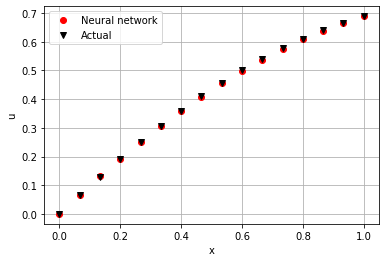

In [14]:
plt.plot(X_test,U_NN,'ro',label='Neural network')
plt.plot(X_test,U_act,'kv',label='Actual')
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.legend()